## Steam Game Analysis and Prediction

### Introduction

This project aims to conduct a predictive analysis on a public dataset encompassing over 80,000 Steam games, each containing a multitude of attributes. The primary objective is to develop a model capable of suggesting similar games based on a user's selection. For instance, if a user selects Grand Theft Auto V, the model would return a top 5 list of games most closely resembling it, such as Grand Theft Auto: San Andreas. 

By leveraging this predictive capability, we seek to enhance game recommendations for Steam users and gain deeper insights into the complex relationships between various game attributes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rapidfuzz import fuzz

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

df = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")
df = df[['Name', 'Categories', 'Genres', 'Tags']]

display("Column Type", df.dtypes)
display("Nan Quantity", df.isna().sum())
display("Duplicated Rows", sum(df.duplicated()))

'Column Type'

Name          object
Categories    object
Genres        object
Tags          object
dtype: object

'Nan Quantity'

Name              6
Categories     4456
Genres         3425
Tags          19986
dtype: int64

'Duplicated Rows'

52

### Data Cleaning and Preparation Initial

To ensure data quality and facilitate subsequent analysis, a comprehensive cleaning process was implemented. Initially, the dataset underwent a transformation to convert object-type columns into categorical data, which is more suitable for analysis. 

Additionally, records containing missing values, particularly in the 'tags' column, were identified and removed to maintain data integrity. Furthermore, 52 duplicate rows were eliminated to prevent redundancy. 

To enhance data consistency, the dataset was subjected to string cleaning operations, including the removal of extra whitespace and conversion to lowercase. 

These preprocessing steps provide a solid foundation for the subsequent analysis and modeling phases.

In [114]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)

df[df.columns] = df[df.columns].astype('category')
df[df.columns] = df.apply(lambda x: x.str.strip().str.lower())

#### Genre Column Analyses

An in-depth analysis of the 'Genres' column revealed the presence of 33 unique categories. However, a significant portion of these categories were deemed irrelevant to game classification, as they primarily represented tools and utilities rather than game genres. To ensure data accuracy and consistency, a rigorous cleaning process was undertaken. This involved identifying and removing genres that did not align with traditional game classifications, such as 'audio production.' 

By eliminating these irrelevant categories and associated rows, the dataset was refined to focus on core gaming genres, thereby improving the quality and reliability of subsequent analyses.

In [115]:
display(df['Genres'].str.split(',').explode().unique())

df_exploded = df['Genres'].str.split(',').explode()

irrelevant_genres = [
    'design & illustration',
    'animation & modeling',
    'software training',
    'audio production',
    'game development',
    'video production',
    'web publishing',
    'photo editing',
    'documentary',
    'accounting',
    'utilities',
    'education',
    '360 video',
    'episodic',
    'tutorial',
    'movie',
    'short',
    ]

df.drop(df_exploded.isin(irrelevant_genres)[df_exploded.isin(irrelevant_genres)].index.drop_duplicates(), inplace=True)

df.reset_index(inplace=True)

array(['casual', 'indie', 'sports', 'action', 'adventure', 'free to play',
       'massively multiplayer', 'rpg', 'strategy', 'simulation',
       'early access', 'racing', 'sexual content', 'nudity', 'violent',
       'gore', 'animation & modeling', 'design & illustration',
       'utilities', 'game development', 'web publishing',
       'audio production', 'video production', 'education',
       'software training', 'accounting', 'photo editing', 'movie',
       'documentary', 'episodic', 'short', 'tutorial', '360 video'],
      dtype=object)

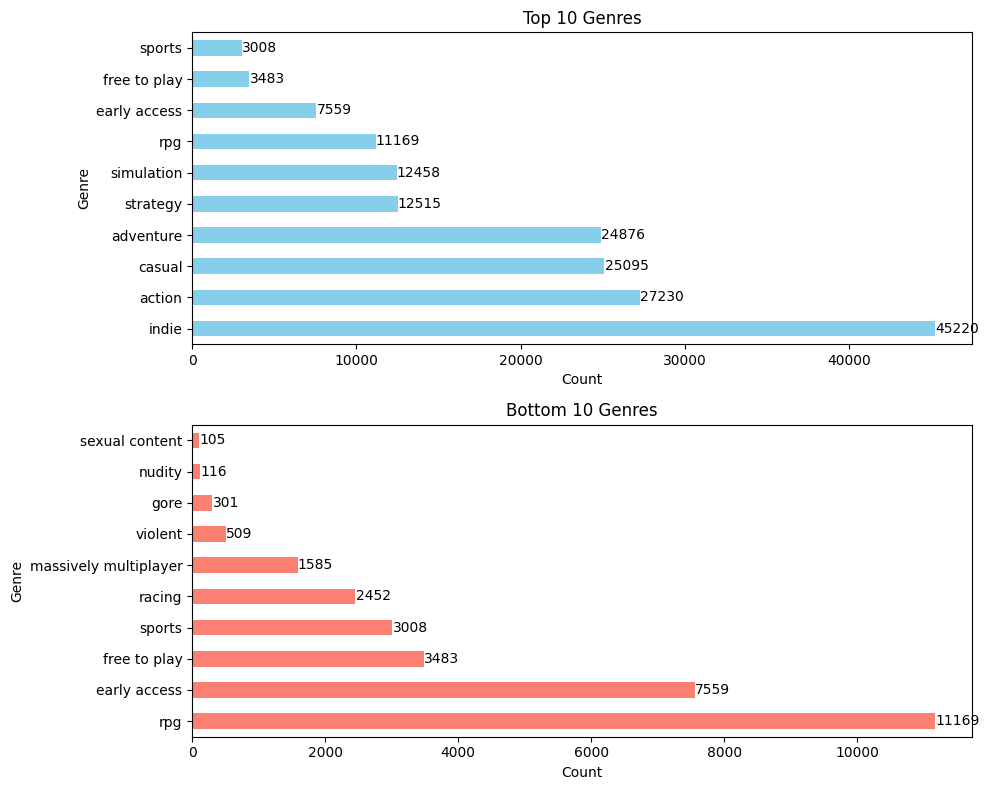

In [ ]:
top_10 = df['Genres'].str.split(',').explode().value_counts().head(10)
bottom_10 = df['Genres'].str.split(',').explode().value_counts().tail(10)

fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

top_10.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Genres')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genre')

for i, v in enumerate(top_10):
    axes[0].text(v + 5, i, str(v), color='black', va='center')

bottom_10.plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Bottom 10 Genres')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Genre')

for i, v in enumerate(bottom_10):
    axes[1].text(v + 5, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

#### Categories Column Analyses


In [153]:
display(df['Tags'].str.split(',').explode().unique())

df_exploded = df['Tags'].str.split(',').explode()

df_exploded.isin(['audio production'])[df_exploded.isin(['audio production'])]

array(['indie', 'casual', 'sports', 'bowling', 'action', 'pixel graphics',
       '2d', 'retro', 'arcade', 'score attack', 'minimalist', 'comedy',
       'singleplayer', 'fast-paced', 'funny', 'parody', 'difficult',
       'gore', 'violent', 'western', 'controller', 'blood',
       '2d platformer', 'atmospheric', 'surreal', 'mystery', 'puzzle',
       'survival', 'adventure', 'linear', 'experimental', 'platformer',
       'precision platformer', 'puzzle-platformer', 'stylized', 'physics',
       'time manipulation', 'nudity', 'sexual content', 'story rich',
       'turn-based combat', 'massively multiplayer', 'multiplayer', 'rpg',
       'tactical rpg', 'exploration', 'pvp', 'mmorpg',
       'turn-based strategy', 'god game', 'strategy', '2.5d', 'magic',
       'medieval', 'mythology', 'class-based', 'turn-based tactics',
       'online co-op', 'co-op', 'tower defense', 'rogue-lite', 'rts',
       'replay value', 'perma death', 'isometric', 'rogue-like',
       'dynamic narration', 're

6625     True
8080     True
10240    True
12489    True
18275    True
21809    True
21899    True
27484    True
28195    True
29933    True
32194    True
32720    True
32941    True
34037    True
34307    True
37016    True
37488    True
37864    True
38770    True
39000    True
41922    True
44240    True
46287    True
47787    True
47867    True
48456    True
50923    True
53334    True
54316    True
55915    True
57874    True
62100    True
Name: Tags, dtype: bool